In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('/Users/kimjuhwan/Desktop/data/car+evaluation/car_data.txt', header=None)
df.columns=["buying", "maint", "doors", "persons", "lug_boot", "safety", "car_evaluation"]
df

,buying,maint,doors,persons,lug_boot,safety,car_evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   buying          1728 non-null   int64 
 1   maint           1728 non-null   int64 
 2   doors           1728 non-null   object
 3   persons         1728 non-null   int64 
 4   lug_boot        1728 non-null   object
 5   safety          1728 non-null   int64 
 6   car_evaluation  1728 non-null   object
dtypes: int64(4), object(3)
memory usage: 94.6+ KB


In [57]:
replacement_dict1 = {'vhigh': 4, 'high': 3, 'med': 2, 'low': 1}
replacement_dict2 = {'2': 1, '4': 2, 'more': 3}
replacement_dict3 = {'low': 1, 'med': 2, 'high': 3}
replacement_dict4 = {'unacc': 1, 'acc': 2, 'good': 3, 'vgood': '4'}
replacement_dict5 = {'2': 1, '3': 2, '4': 3, '5more': 4}
replacement_dict6 = {'small': 1, 'med': 2, 'big': 3}

df['buying'] = df['buying'].replace(replacement_dict1)
df['maint'] = df['maint'].replace(replacement_dict1)
df['persons'] = df['persons'].replace(replacement_dict2)
df['safety'] = df['safety'].replace(replacement_dict3)
df['doors'] = df['doors'].replace(replacement_dict5)
df['lug_boot'] = df['lug_boot'].replace(replacement_dict6)
df['car_evaluation'] = df['car_evaluation'].replace(replacement_dict4)

In [58]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'car_evaluation'],
      dtype='object')

In [59]:
df.isna().sum()

buying            0
maint             0
doors             0
persons           0
lug_boot          0
safety            0
car_evaluation    0
dtype: int64

In [60]:
df_data = pd.DataFrame(data=df, columns=["buying", "maint", "persons", "safety"])
df_target = pd.DataFrame(data=df, columns=["car_evaluation"])

In [61]:
df_data

,buying,maint,persons,safety
0,4,4,1,1
1,4,4,1,2
2,4,4,1,3
3,4,4,1,1
4,4,4,1,2
...,...,...,...,...
1723,1,1,3,2
1724,1,1,3,3
1725,1,1,3,1
1726,1,1,3,2


In [62]:
df_target

,car_evaluation
0,1
1,1
2,1
3,1
4,1
...,...
1723,3
1724,4
1725,1
1726,3


In [63]:
car_data = pd.concat([df_data, df_target], axis=1)
car_data

,buying,maint,persons,safety,car_evaluation
0,4,4,1,1,1
1,4,4,1,2,1
2,4,4,1,3,1
3,4,4,1,1,1
4,4,4,1,2,1
...,...,...,...,...,...
1723,1,1,3,2,3
1724,1,1,3,3,4
1725,1,1,3,1,1
1726,1,1,3,2,3


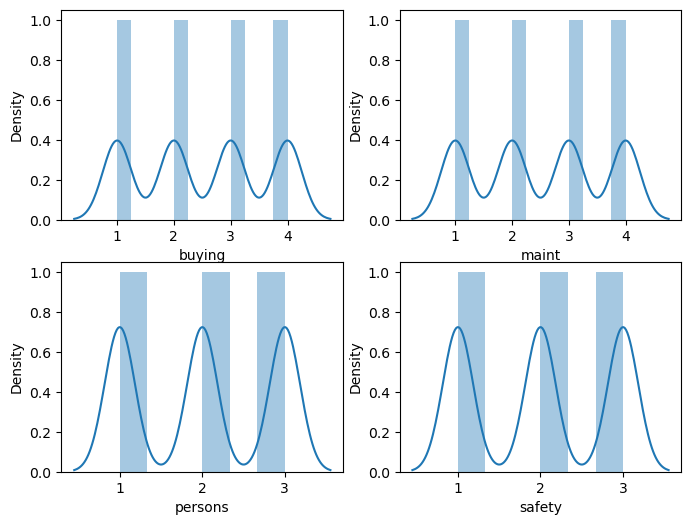

In [64]:
f, axes = plt.subplots(2,2,figsize=(8,6))
sns.distplot(car_data['buying'], ax=axes[0,0])
sns.distplot(car_data['maint'], ax=axes[0,1])
sns.distplot(car_data['persons'], ax=axes[1,0])
sns.distplot(car_data['safety'], ax=axes[1,1])
plt.show()

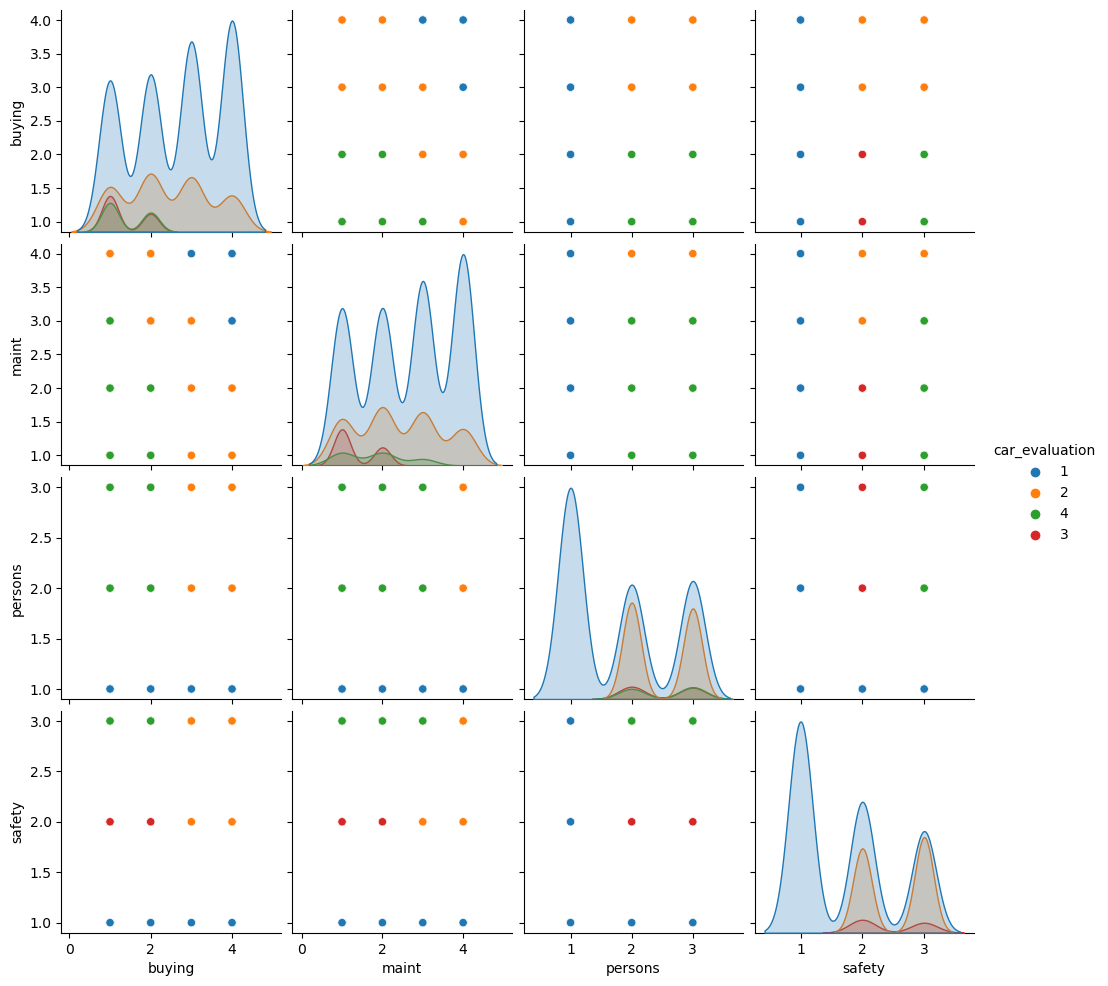

In [65]:
sns.pairplot(car_data, vars=['buying', 'maint', 'persons', 'safety'], hue='car_evaluation')
plt.show()

<Axes: title={'center': 'Analyze Correlation of Features'}>

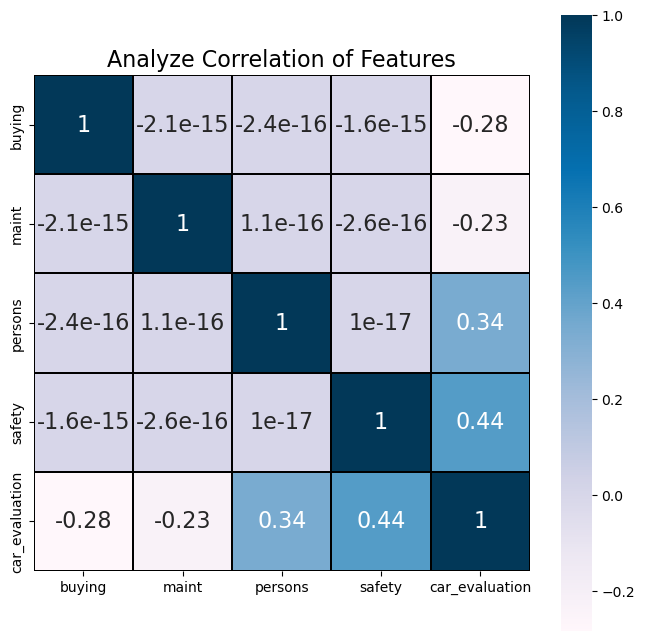

In [66]:
colormap = plt.cm.PuBu
plt.figure(figsize=(8,8))
plt.title("Analyze Correlation of Features", y=1.0, size=16)
sns.heatmap(car_data.astype(float).corr(), linewidths =0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor="black", annot=True, annot_kws={"size":16})

In [67]:
x = car_data
x = x.drop(columns=['car_evaluation'], axis=1)

In [68]:
x

,buying,maint,persons,safety
0,4,4,1,1
1,4,4,1,2
2,4,4,1,3
3,4,4,1,1
4,4,4,1,2
...,...,...,...,...
1723,1,1,3,2
1724,1,1,3,3
1725,1,1,3,1
1726,1,1,3,2


In [69]:
y=car_data['car_evaluation']

In [74]:
y = y.astype(int)
y

0       1
1       1
2       1
3       1
4       1
       ..
1723    3
1724    4
1725    1
1726    3
1727    4
Name: car_evaluation, Length: 1728, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1296, 4), (432, 4), (1296,), (432,))

In [76]:
#SVM
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(x_train, y_train)

pred_svm = clf_svm.predict(x_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.8680555555555556
[[272  24   0   0]
 [  6  80  11   2]
 [  0   0  12   9]
 [  0   5   0  11]]


In [77]:
#LR

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)

print("\n--- Logistic Regression Classfier ---")
print(accuracy_score(y_test, pred_lr))
print(confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classfier ---
0.7731481481481481
[[268  24   4   0]
 [ 42  52   4   1]
 [  4   6   4   7]
 [  0   6   0  10]]


In [78]:
#DT
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)

print("\n--- Decision Tree Classifier ---")
print(accuracy_score(y_test, pred_dt))
print(confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.8495370370370371
[[280  16   0   0]
 [ 17  74   7   1]
 [  0   7   8   6]
 [  0   7   4   5]]


In [79]:
#RT
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

print("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))


--- Random Forest ---
0.8564814814814815
[[274  22   0   0]
 [ 11  79   7   2]
 [  0   7   8   6]
 [  0   3   4   9]]
